<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/Spato_temporal_permutation2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import mne
import pickle
from scipy import stats

# Channel location

In [ ]:
mne.channels.get_builtin_montages()

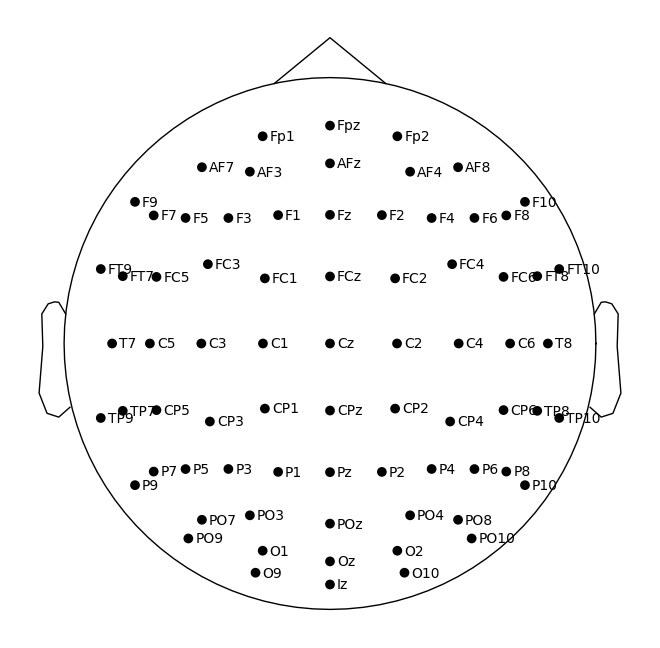

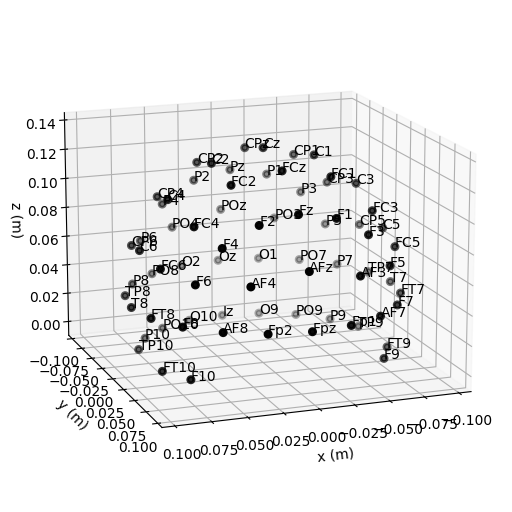

In [63]:
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
easycap_montage.plot()
fig = easycap_montage.plot(kind="3d", show = False)
fig = fig.gca().view_init(azim=70, elev=15)

chname = easycap_montage.ch_names

In [64]:
print(chname)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'F1', 'F2', 'FC1', 'FC2', 'C1', 'C2', 'CP1', 'CP2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'FC5', 'FC6', 'C5', 'C6', 'CP5', 'CP6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'F9', 'F10', 'FT9', 'FT10', 'TP9', 'TP10', 'P9', 'P10', 'PO9', 'PO10', 'O9', 'O10', 'Fpz', 'AFz', 'FCz', 'CPz', 'POz', 'Oz', 'Iz']


In [42]:
import mne

# Load the easycap-M1 montage
easycap_montage = mne.channels.make_standard_montage("easycap-M1")

# Define the electrode names you want to extract
selected_electrodes = ["Fp1", "Fp2", "F3", "F4", "F7", "F8", "C3", "C4", "P3", "P4", "T7", "T8", "P7", "P8", "PO3", "PO4", "PO7", "PO8", "O1", "O2", "Fz", "Cz", "Pz", "POz", "Oz"]

# Filter the montage to keep only the selected electrodes
selected_positions = {ch_name: easycap_montage.dig[easycap_montage.ch_names.index(ch_name)]['r'] for ch_name in selected_electrodes}

posi = easycap_montage.get_positions()
print(posi)

# Extract the 'ch_pos' dictionary
ch_pos_dict = posi['ch_pos']

# Create a DataFrame
df_ch_position = pd.DataFrame(ch_pos_dict).T.reset_index()

# Rename the columns
df_ch_position.columns = ['Channel', 'X', 'Y', 'Z']

df_ch_position.head()

filtered_df_ch_position = df_ch_position[df_ch_position['Channel'].isin(selected_positions)]

filtered_df_ch_position.to_csv("electrode_position.csv", index=False)

{'ch_pos': OrderedDict([('Fp1', array([-0.02933873,  0.09029533, -0.00331545])), ('Fp2', array([ 0.02933873,  0.09029533, -0.00331545])), ('F3', array([-0.05177571,  0.06393767,  0.0475    ])), ('F4', array([0.05177571, 0.06393767, 0.0475    ])), ('C3', array([-0.06833728, -0.        ,  0.06599255])), ('C4', array([0.06833728, 0.        , 0.06599255])), ('P3', array([-0.05177571, -0.06393767,  0.0475    ])), ('P4', array([ 0.05177571, -0.06393767,  0.0475    ])), ('O1', array([-0.02933873, -0.09029533, -0.00331545])), ('O2', array([ 0.02933873, -0.09029533, -0.00331545])), ('F7', array([-0.0768098 ,  0.05580558, -0.00331545])), ('F8', array([ 0.0768098 ,  0.05580558, -0.00331545])), ('T7', array([-0.09494213, -0.        , -0.00331545])), ('T8', array([ 0.09494213,  0.        , -0.00331545])), ('P7', array([-0.0768098 , -0.05580558, -0.00331545])), ('P8', array([ 0.0768098 , -0.05580558, -0.00331545])), ('Fz', array([4.18445162e-18, 6.83372810e-02, 6.59925452e-02])), ('Cz', array([0.   

In [59]:
"""
print(easycap_montage.ch_names)

# Create lists to store data
ch_names = []
positions = []

# Loop through each electrode and gather data
for ch_name, dig_point in zip(easycap_montage.ch_names, easycap_montage.dig):
    ch_names.append(ch_name)
    positions.append(dig_point['r'])

# Create a DataFrame with electrode names and positions
df_easycap = pd.DataFrame({'Electrode': ch_names, 'Position': positions})

# Split the 'Position' column into X, Y, Z columns
df_easycap[['X', 'Y', 'Z']] = pd.DataFrame(df_easycap['Position'].tolist(), index=df_easycap.index)

# Drop the original 'Position' column
df_easycap.drop(columns=['Position'], inplace=True)

# Display the DataFrame
print(df_easycap)

# Save the DataFrame to a CSV file
df_easycap.to_csv('easycap_dig_information.csv', index=False)
"""

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'F1', 'F2', 'FC1', 'FC2', 'C1', 'C2', 'CP1', 'CP2', 'P1', 'P2', 'AF3', 'AF4', 'FC3', 'FC4', 'CP3', 'CP4', 'PO3', 'PO4', 'F5', 'F6', 'FC5', 'FC6', 'C5', 'C6', 'CP5', 'CP6', 'P5', 'P6', 'AF7', 'AF8', 'FT7', 'FT8', 'TP7', 'TP8', 'PO7', 'PO8', 'F9', 'F10', 'FT9', 'FT10', 'TP9', 'TP10', 'P9', 'P10', 'PO9', 'PO10', 'O9', 'O10', 'Fpz', 'AFz', 'FCz', 'CPz', 'POz', 'Oz', 'Iz']
   Electrode             X         Y         Z
0        Fp1 -8.609924e-02 -0.000000 -0.040149
1        Fp2  5.272058e-18  0.086099 -0.040149
2         F3  8.609924e-02  0.000000 -0.040149
3         F4 -2.933873e-02  0.090295 -0.003315
4         C3  2.933873e-02  0.090295 -0.003315
..       ...           ...       ...       ...
69       FCz  2.660613e-02 -0.081885 -0.040149
70       CPz  5.813529e-18  0.094942 -0.003315
71       POz  5.430705e-18  0.088690  0.034045
72        Oz  2.272911e-18  0.037119  0.08

<ipython-input-43-5924272dadff>:9: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  custom_montage.plot()


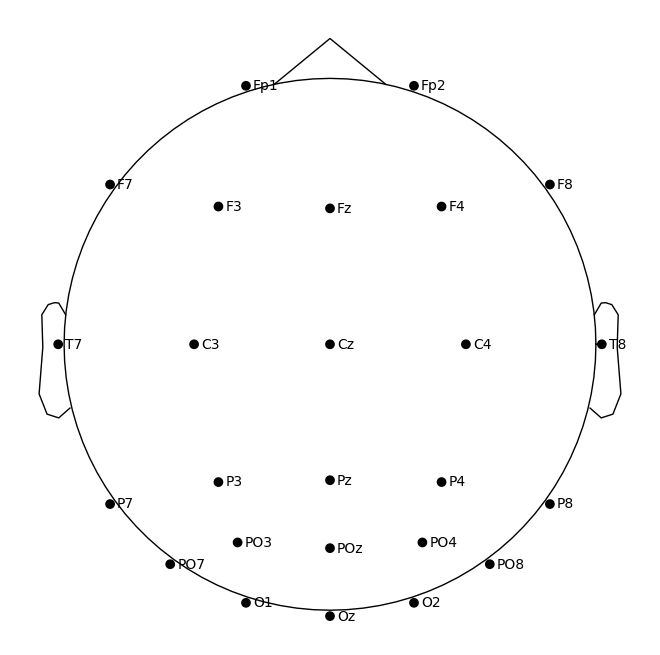

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 25


In [43]:
# Load the CSV file into a Pandas DataFrame
#montage_df = pd.read_csv('easycap_dig_information_filtered.csv')
montage_df = pd.read_csv("electrode_position.csv")

# Create a Montage object from the DataFrame
custom_montage = mne.channels.make_dig_montage(ch_pos=dict(zip(montage_df['Channel'], montage_df[['X', 'Y', 'Z']].values)))

# Plot the custom montage to verify
custom_montage.plot()

# Create the info object with positions
info = mne.create_info(ch_names=montage_df['Channel'].tolist(), sfreq=1000, ch_types='eeg')


# Create a Montage with digitization points
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(montage_df['Channel'], montage_df[['X', 'Y', 'Z']].values)), coord_frame='head')

# Set the montage to the info object
info.set_montage(montage)

# Calculate the adjacency matrix
adjacency, ch_names = mne.channels.find_ch_adjacency(info, ch_type='eeg')


In [44]:
ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T7',
 'T8',
 'P7',
 'P8',
 'Fz',
 'Cz',
 'Pz',
 'PO3',
 'PO4',
 'PO7',
 'PO8',
 'POz',
 'Oz']

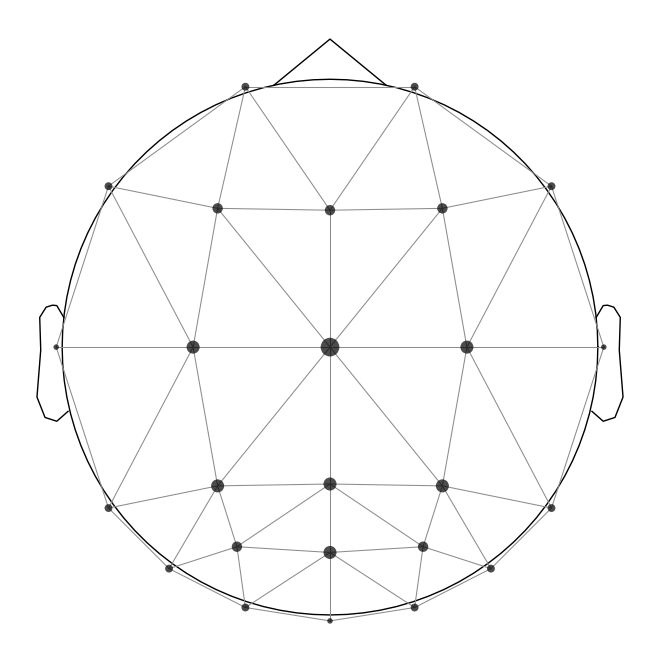

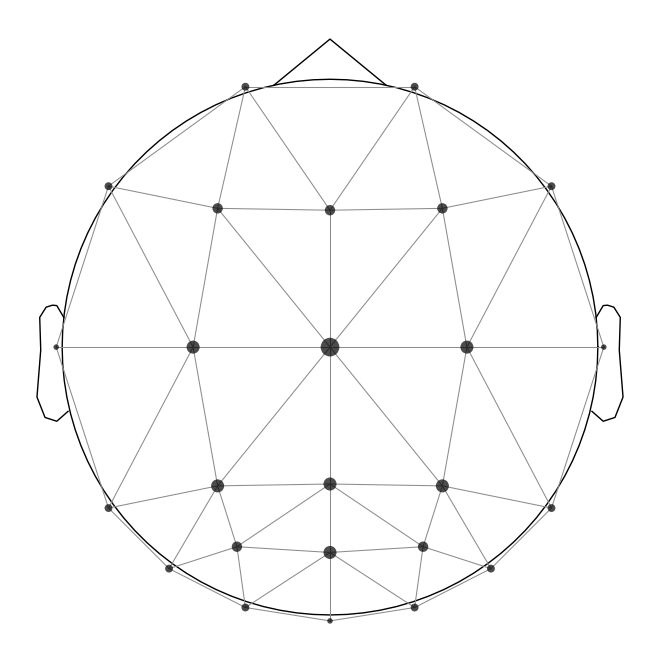

In [45]:
adjacency
mne.viz.plot_ch_adjacency(info, adjacency, ch_names)

In [ ]:
montage.dig

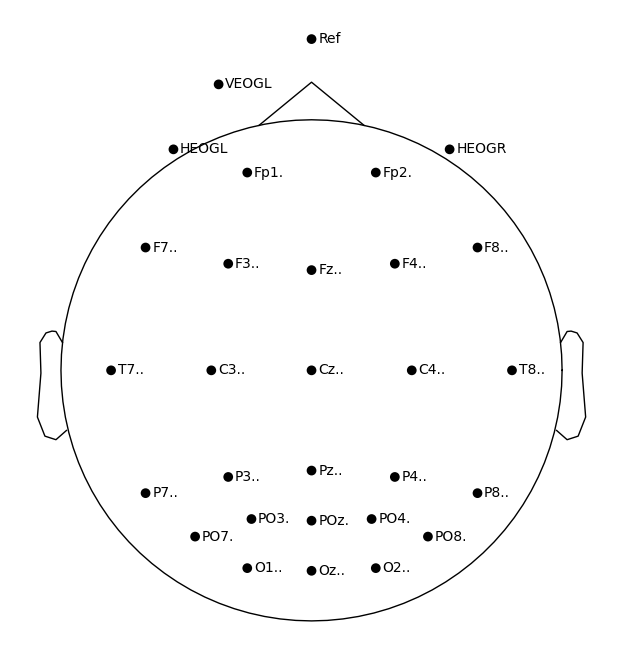

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.


RuntimeError: ignored

In [52]:
"""
mon = mne.channels.read_custom_montage("Ch29n_kei.locs", coord_frame="head")
mon.plot()

# Create the info object
info = mne.create_info(ch_names=mon.ch_names, sfreq=1000, ch_types='eeg')

# Get the positions of the electrodes
pos = np.array([mon.dig[i]['r'] for i in range(len(mon.dig))])

# Calculate the adjacency matrix
adjacency, ch_names = mne.channels.find_ch_adjacency(info, ch_type='eeg')
"""

# Import data

In [30]:
### 参加者リストを作る

# Participant list
last_par_num = 2
excluded_pars = []

participants = []

for n in range(1, last_par_num+1):
  participants.append("s" + str(n))

for excluded_par in excluded_pars:
  participants.remove(excluded_par)

print(participants)

['s1', 's2']


In [31]:
# Import each participant's csv (time * electrode) and add it to df_list (list of data frame)

df_list_cond1 = []
df_list_cond2 = []

for n, par in enumerate(participants, start=1):
  df_cond1 = pd.read_csv("happy_" + par + "_ERP_Smile 0 .txt", delimiter='\t', index_col=0, header=None)
  df_cond2 = pd.read_csv("happy_" + par + "_ERP_Smile 3 .txt", delimiter='\t', index_col=0, header=None)
  df_list_cond1.append(df_cond1.transpose())
  df_list_cond2.append(df_cond2.transpose())

"""
# Now we have a df_list that contains df (time * electrode) for each participant. For future use, I save it using pickle.
with open('my_list.pkl', 'wb') as file:
    pickle.dump(df_lisdf[0t, file)
"""

"""
# To open it ... (maybe loaded df_list should be renamed as df_list)
with open('my_list.pkl', 'rb') as file:
    loaded_df_list = pickle.load(file)
"""

"\n# To open it ... (maybe loaded df_list should be renamed as df_list)\nwith open('my_list.pkl', 'rb') as file:\n    loaded_df_list = pickle.load(file)\n"

In [32]:
# 出力チェック（[]内の数字は参加者番号ではないので注意）
display(df_list_cond1[1])

,time,VEOGL,HEOGL,HEOGR,Fp1,Fp2,F7,F3,Fz,F4,...,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2,Ref
1,-100.0,0.1528,0.2327,0.1552,-0.0663,0.1537,0.4520,0.5354,0.6979,0.6734,...,-0.1764,1.0575,0.2659,-0.9795,-1.8490,-0.6997,0.2714,-0.4338,-1.0313,0.0
2,-96.0,0.1197,0.2065,0.1905,-0.0263,0.2276,0.4907,0.5946,0.6914,0.6485,...,0.4053,1.8117,0.9988,-0.5041,-1.3073,0.0130,1.0059,0.0432,-0.5553,0.0
3,-92.0,0.0684,0.1519,0.1792,-0.0104,0.1783,0.4563,0.5708,0.6232,0.5592,...,0.9541,2.4211,1.5969,-0.0627,-0.7459,0.6929,1.6086,0.4520,-0.1003,0.0
4,-88.0,0.0030,0.0825,0.1216,-0.0353,0.0251,0.3631,0.4720,0.5030,0.4237,...,1.4489,2.8775,2.0373,0.3360,-0.1882,1.3262,2.0558,0.7876,0.3239,0.0
5,-84.0,-0.0649,0.0153,0.0370,-0.1091,-0.1838,0.2348,0.3170,0.3459,0.2619,...,1.8665,3.1811,2.3161,0.6956,0.3493,1.8977,2.3433,1.0569,0.7184,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,484.0,-0.7454,-0.5883,4.0029,3.8799,5.4002,2.9875,5.5271,7.7684,8.3009,...,7.8094,8.0034,10.3018,9.7204,8.8406,5.7605,8.7284,7.8502,6.5899,0.0
148,488.0,-0.8431,-0.6572,4.1093,3.8667,5.3122,2.8114,5.1674,7.1432,7.8334,...,7.4165,7.9028,9.9219,9.3081,8.6578,5.3481,8.5703,7.6735,6.3738,0.0
149,492.0,-0.9195,-0.7033,4.2003,3.8715,5.3136,2.6834,4.8699,6.5562,7.3452,...,6.8783,7.7343,9.5429,9.0324,8.4685,4.8517,8.4429,7.6192,6.1901,0.0
150,496.0,-0.9750,-0.7171,4.2660,3.9069,5.4304,2.6311,4.6497,6.0440,6.8581,...,6.2238,7.5220,9.2121,8.8979,8.2548,4.3084,8.3459,7.6593,6.0266,0.0


In [ ]:
#参加者全員のデータを重ねる。=>3次元配列を作成（参加者×タイムポイント×チャンネル）

In [33]:
# Convert each DataFrame to a NumPy array
array_list_cond1 = [df.to_numpy() for df in df_list_cond1]
array_list_cond2 = [df.to_numpy() for df in df_list_cond2]

# Stack the NumPy arrays along the first dimension to create a 3D array
# axis=0は、デフォルトなので指定しなくてもいい。これは奥行き方向に重ねることを意味する。
three_dim_array_cond1 = np.stack(array_list_cond1, axis=0)
three_dim_array_cond2 = np.stack(array_list_cond2, axis=0)

# Check the shape of the resulting 3D array
print(three_dim_array_cond1.shape)
print(three_dim_array_cond2.shape)

(2, 151, 30)
(2, 151, 30)


### Extract specific time range

In [62]:
columns = df_list_cond1[1].columns[1:]
print(columns.to_list())

['VEOGL', 'HEOGL', 'HEOGR', 'Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Ref']


In [75]:
t_min = 150
t_max = 250

timed_cond1 = (three_dim_array_cond1[:, (t_min <= three_dim_array_cond1[0, :, 0]) & (three_dim_array_cond1[0, :, 0] <= t_max), 1:])
electrodes_to_remove = ["HEOGL", "HEOGR", "VEOGL", "Ref"]

columns = df_list_cond1[1].columns[1:]
electrode_names = columns.to_list()  # 25電極の名前が入ったリストと仮定

# 電極を削除する
selected_electrodes = [elec for elec in electrode_names if elec not in electrodes_to_remove]
print(len(selected_electrodes)) #25

# 新しい配列を作成する
timed_cond1_filtered = timed_cond1[:, :, [electrode_names.index(elec) for elec in selected_electrodes]]

# 時間の配列を作る
time = (three_dim_array_cond1[0, (t_min <= three_dim_array_cond1[0, :, 0]) & (three_dim_array_cond1[0, :, 0] <= t_max), 0])

timed_cond2 = (three_dim_array_cond2[:, (t_min <= three_dim_array_cond2[0, :, 0]) & (three_dim_array_cond2[0, :, 0] <= t_max), 1:])
timed_cond2_filtered = timed_cond2[:, :, [electrode_names.index(elec) for elec in selected_electrodes]]


# 条件を満たす要素を抽出
filtered_data_cond1 = timed_cond1_filtered.reshape(timed_cond1_filtered.shape[0], timed_cond1_filtered.shape[1], timed_cond1_filtered.shape[2])
filtered_data_cond2 = timed_cond2_filtered.reshape(timed_cond2_filtered.shape[0], timed_cond2_filtered.shape[1], timed_cond2_filtered.shape[2])

25


### Check

In [77]:
# for check

# 参加者1人分を取得
cur = filtered_data_cond1[1]

# index（行名）を時間に、columns（列名）を電極に
df = pd.DataFrame(cur, index=time, columns=selected_electrodes)
df.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,...,P4,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2
152.0,0.4728,0.8333,0.8303,0.9749,1.4367,1.8451,0.3746,-0.1189,2.2445,2.2820,...,2.3782,-1.6222,2.9733,7.4333,9.4089,-0.7715,-1.9867,7.4396,7.9884,2.0215
156.0,0.8567,1.4006,1.1120,1.5300,2.0972,2.5351,0.7716,-0.1046,2.5381,2.8656,...,2.4194,-2.7816,1.5688,7.2328,9.3310,-0.8735,-3.0958,6.6409,7.3190,1.3703
160.0,1.2964,2.0560,1.3652,2.0564,2.7570,3.2315,1.2019,0.0282,2.9053,3.5233,...,2.7408,-3.6229,0.3119,7.1555,9.3641,-0.5291,-3.7828,5.9877,6.8339,1.0493
164.0,1.7482,2.7377,1.5719,2.5059,3.3693,3.8916,1.6431,0.2164,3.2921,4.1933,...,3.2225,-4.2326,-0.8088,7.1369,9.4658,0.1068,-4.2033,5.4511,6.5258,0.9700
168.0,2.1476,3.3541,1.7183,2.8415,3.8828,4.4719,2.0684,0.3724,3.6253,4.7929,...,3.7322,-4.6853,-1.7992,7.1067,9.5721,0.8680,-4.4956,4.9982,6.3611,1.0328


In [78]:
# 参加者1人分を取得
cur2 = filtered_data_cond2[1]

# index（行名）を時間に、columns（列名）を電極に
df2 = pd.DataFrame(cur2, index=time, columns=selected_electrodes)
df2.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,T7,C3,Cz,...,P4,P8,PO7,PO3,POz,PO4,PO8,O1,Oz,O2
152.0,1.1228,1.1549,0.7766,1.8130,1.7482,1.1436,-0.4951,0.0949,3.5664,3.2664,...,2.4287,0.2267,6.4498,10.6244,10.2563,-0.2590,0.2553,9.9313,8.8916,2.9365
156.0,1.4545,1.7217,0.9681,2.3643,2.4484,1.8524,-0.1237,-0.0125,3.8350,3.8490,...,2.5730,-0.9490,5.2546,10.5113,10.3440,-0.3237,-0.6690,9.3142,8.4054,2.3378
160.0,1.8405,2.3044,1.1136,2.8537,3.1205,2.5561,0.3144,0.0234,4.0357,4.4477,...,2.8489,-2.0199,3.8491,10.1870,10.3232,-0.0890,-1.4465,8.5132,7.8729,1.8962
164.0,2.2486,2.8265,1.2191,3.2471,3.7223,3.2059,0.7823,0.1867,4.1364,5.0136,...,3.1920,-3.0171,2.2498,9.6259,10.1983,0.3579,-2.1749,7.5409,7.3221,1.5839
168.0,2.6348,3.2216,1.2948,3.5252,4.2170,3.7602,1.2268,0.4110,4.1231,5.4945,...,3.5348,-3.9556,0.5321,8.8445,9.9857,0.9195,-2.9315,6.4527,6.7899,1.3680


引き算（2人目）が正しくXに反映されていることを確認した。↓

In [79]:
print(0.4728 - 1.1228)

-0.65


## Compute differences between 2 conditions

The first dimension of X should correspond to the difference between paired samples (observations) in two conditions. The second dimension correspond to the time. And, the last dimension should be spatial.

In [80]:
cond1 = np.array(filtered_data_cond1)
cond2 = np.array(filtered_data_cond2)

X = cond1 - cond2

In [81]:
print(X)

[[[-0.6171  0.5024 -0.5164 ...  0.2847  0.1768  0.1963]
  [-0.782   0.2913 -0.7784 ...  0.0777 -0.0522 -0.1121]
  [-0.7793  0.0287 -1.1072 ... -0.0688 -0.2055 -0.3561]
  ...
  [ 0.3493 -1.0051  0.0826 ...  1.4561  1.5612  1.0235]
  [ 0.8091 -0.6938  0.0644 ...  1.1984  1.3335  0.9005]
  [ 1.2346 -0.2098  0.0691 ...  0.9579  1.0475  0.7348]]

 [[-0.65   -0.3216  0.0537 ... -2.4917 -0.9032 -0.915 ]
  [-0.5978 -0.3211  0.1439 ... -2.6733 -1.0864 -0.9675]
  [-0.5441 -0.2484  0.2516 ... -2.5255 -1.039  -0.8469]
  ...
  [-1.0262 -1.7101  0.0656 ...  1.1645  0.5409  0.1603]
  [-0.9829 -1.5706  0.1291 ...  1.0411  0.2714 -0.2045]
  [-0.9643 -1.4958  0.1687 ...  0.9548  0.0524 -0.4844]]]


# MNE python spatio-temporal cluster test

注意：一旦、n_permutation=10で動作確認

In [82]:
print(adjacency.shape)

(25, 25)


In [83]:
t_obs, clusters, cluster_pv, H0 = mne.stats.spatio_temporal_cluster_1samp_test(X, threshold=None, n_permutations=20, tail=0, stat_fun=None, adjacency=adjacency, n_jobs=None, seed=None, max_step=1, spatial_exclude=None, step_down_p=0, t_power=1, out_type='indices', check_disjoint=False, buffer_size=1000, verbose=None)

Using a threshold of 12.706205
stat_fun(H1): min=-68.631336 max=663.583333
Running initial clustering …
Found 26 clusters


  0%|          | Permuting (exact test) : 0/1 [00:00<?,       ?it/s]

Note: The following error arises if the matrix shape is not what is expected. More specifically, the matrix should be square and row/column should have the number of electrodes. ValueError: adjacency (len 25) must be of the correct size, i.e. be equal to or evenly divide the number of tests (725).

# Visualization
spatial要素が入るので、こうはいかないかも...

[(array([6, 7, 8]), array([16, 16, 16])), (array([9]), array([11])), (array([9]), array([15])), (array([12]), array([18])), (array([12]), array([22])), (array([13, 14, 15]), array([24, 24, 24])), (array([14, 15]), array([17, 17])), (array([15, 16, 17]), array([12, 12, 12])), (array([17, 18, 19, 20, 21, 22, 23, 23, 24, 24]), array([17, 17, 17, 17, 17, 17,  5, 17,  5, 17])), (array([17, 18, 19, 20]), array([20, 20, 20, 20])), (array([19]), array([24])), (array([20]), array([14])), (array([22, 23, 24]), array([12, 12, 12])), (array([23, 24]), array([22, 22])), (array([24]), array([8])), (array([0]), array([0])), (array([1, 1]), array([ 8, 19])), (array([1]), array([9])), (array([2]), array([14])), (array([5]), array([12])), (array([5]), array([16])), (array([8, 9]), array([0, 0])), (array([8]), array([9])), (array([9]), array([4])), (array([10]), array([3])), (array([10]), array([8]))]
[0.5 1.  1.  1.  0.5 0.5 1.  0.5 0.5 0.5 1.  1.  0.5 0.5 1.  1.  1.  1.
 1.  1.  1.  1.  0.5 1.  1.  1. 

Text(0.5, 0, 'time (ms)')

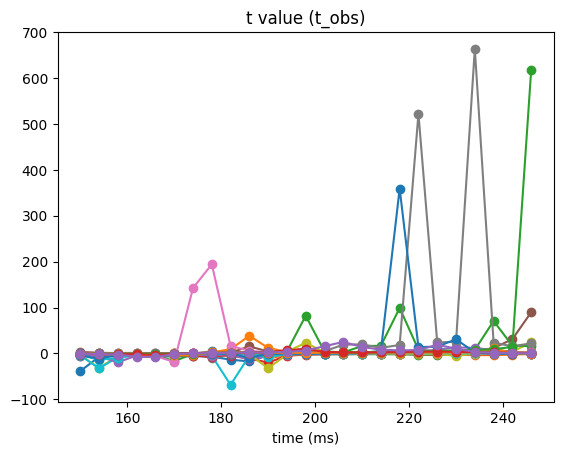

In [84]:
#print(t_obs) # observed t-value for each time point
print(clusters) # clusters
print(cluster_pv) # p-value for each clusters identified above
#print(H0)

# Plottign t-values for each time point
import matplotlib.pyplot as plt
plt.plot(np.arange(150, 250, 4), t_obs, marker='o')
plt.title("t value (t_obs)")
plt.xlabel("time (ms)")

In [88]:
if any(pv<0.05 for pv in cluster_pv):
  print("Yes, there is a significant cluster(s)")
else:
  print("No, there is not")

No, there is not
